# High-level introduction to <code>pandas</code>
For a more complete introduction to <code>pandas</code>, see [https://pandas.pydata.org/](https://pandas.pydata.org/).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Series
Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.).

In [ ]:
data = np.random.randn(20)
index = range(1990, 2010)

In [ ]:
print (data)
print (index)

In [ ]:
y = pd.Series(data, index=index)

In [ ]:
print (y)

In [ ]:
salaries = {
    'gino': 1500, 'maria': 2560.34, 'luca': None, 'federico': 2451
}

In [ ]:
s = pd.Series(salaries)

In [ ]:
print (s)

In [ ]:
k = pd.Series({
    'a': 'v', 'b': None
})

In [ ]:
print (k)

### Access series as arrays

In [ ]:
print (s[:2], '\n')
print (s[s > s.median()], '\n')
print (np.log(s), '\n')
print (s + s, '\n')
print (s * 3, '\n')
print (y[4:8] + y[4:10])

### Access series as dictionaries

# Data Frames
From [http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe)

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:

- Dict of 1D ndarrays, lists, dicts, or Series
- 2-D numpy.ndarray
- Structured or record ndarray
- A Series
- Another DataFrame

Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index.

If axis labels are not passed, they will be constructed from the input data based on common sense rules.

In [ ]:
k = {'years': y, 'salaries': s}
df = pd.DataFrame(k)

In [ ]:
print (df)

In [ ]:
data = {}
for k, v in s.items():
    data[k] = {}
    for d, w in y.items():
        data[k][d] = v + (v*w)

In [ ]:
ydf = pd.DataFrame(data)

In [ ]:
print (ydf)

In [ ]:
ydf.head()

In [ ]:
pd.DataFrame.from_dict(data, orient='index').head()

## Loading and manipulating data
Retrieve the complete local dataset from <a href="https://www.kaggle.com/daveianhickey/2000-16-traffic-flow-england-scotland-wales">Kaggle website</a>.

In [3]:
accidents = '/Users/alfio/Dati/traffic-accidents/accidents_2012_to_2014.csv'
A = pd.read_csv(accidents, low_memory=False)

In [4]:
A.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19/01/2012,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10/01/2012,...,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18/01/2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002890,2012


In [58]:
A[['Date', 'Time']].head()

,Date,Time
0,19/01/2012,20:35
1,04/01/2012,17:00
2,10/01/2012,10:07
3,18/01/2012,12:20
4,17/01/2012,20:24


In [62]:
from datetime import datetime

def todate(d, t):
    try:
        dt = datetime.strptime(" ".join([d, t]), '%d/%m/%Y %H:%M')
    except TypeError:
        dt = np.nan
    return dt

In [63]:
A['Datetime'] = [todate(x.Date, x.Time) for i, x in A.iterrows()]

In [64]:
A.shape

(464697, 34)

In [65]:
A.dtypes

Accident_Index                                         object
Location_Easting_OSGR                                   int64
Location_Northing_OSGR                                  int64
Longitude                                             float64
Latitude                                              float64
Police_Force                                            int64
Accident_Severity                                       int64
Number_of_Vehicles                                      int64
Number_of_Casualties                                    int64
Date                                                   object
Day_of_Week                                             int64
Time                                                   object
Local_Authority_(District)                              int64
Local_Authority_(Highway)                              object
1st_Road_Class                                          int64
1st_Road_Number                                         int64
Road_Typ

## Access dataframe by index and col

In [66]:
A.iloc[2:6] # gets rows (or columns) at particular positions in the index (so it only takes integers).

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Datetime
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10/01/2012,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002893,2012,2012-01-10 10:07:00
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18/01/2012,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002886,2012,2012-01-18 12:20:00
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17/01/2012,...,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002890,2012,2012-01-17 20:24:00
5,201201BS70006,526090,177600,-0.185496,51.483253,1,3,2,1,19/01/2012,...,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002912,2012,2012-01-19 07:30:00


In [10]:
A.loc[2:6] # gets rows (or columns) with particular labels from the index

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10/01/2012,...,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18/01/2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002890,2012
5,201201BS70006,526090,177600,-0.185496,51.483253,1,3,2,1,19/01/2012,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002912,2012
6,201201BS70007,527780,179680,-0.160418,51.501567,1,3,1,1,12/01/2012,...,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002818,2012


In [20]:
selection = A[A['Road_Surface_Conditions'] == 'Dry'].sort_values(
    'Number_of_Casualties', ascending=False)
selection[['Weather_Conditions', 'Police_Force', 
           'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties']].head()

,Weather_Conditions,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties
410419,Fine without high winds,41,2,2,93
362889,Fine without high winds,11,2,2,87
287670,Fog or mist,46,2,67,70
446421,Fine without high winds,53,2,1,54
387198,Fine without high winds,22,2,2,41


In [22]:
selection[['Weather_Conditions', 'Police_Force', 'Accident_Severity', 
           'Number_of_Vehicles', 'Number_of_Casualties']].groupby('Weather_Conditions').mean()

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties
Weather_Conditions,,,,
Fine with high winds,32.652875,2.811360,1.796283,1.352384
Fine without high winds,27.051892,2.830949,1.846165,1.321455
Fog or mist,39.051163,2.797674,1.997674,1.520930
Other,29.449333,2.868000,1.788000,1.269333
Raining with high winds,32.687500,2.833333,1.895833,1.458333
Raining without high winds,38.734211,2.873684,1.792105,1.297368
Snowing with high winds,45.666667,2.666667,1.777778,1.777778
Snowing without high winds,31.560976,2.902439,1.780488,1.195122
Unknown,27.058422,2.872004,1.766977,1.217710


In [23]:
sel = selection[['Weather_Conditions', 'Police_Force', 'Accident_Severity', 
           'Number_of_Vehicles', 'Number_of_Casualties']]

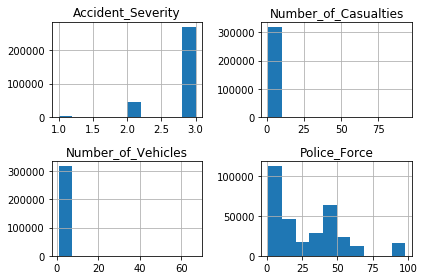

In [27]:
sel.hist()
plt.tight_layout()
plt.show()

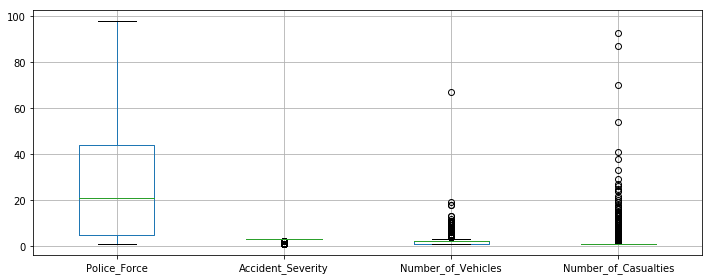

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), sharey=True)
sel.boxplot(ax=axes)
plt.tight_layout()
plt.show()

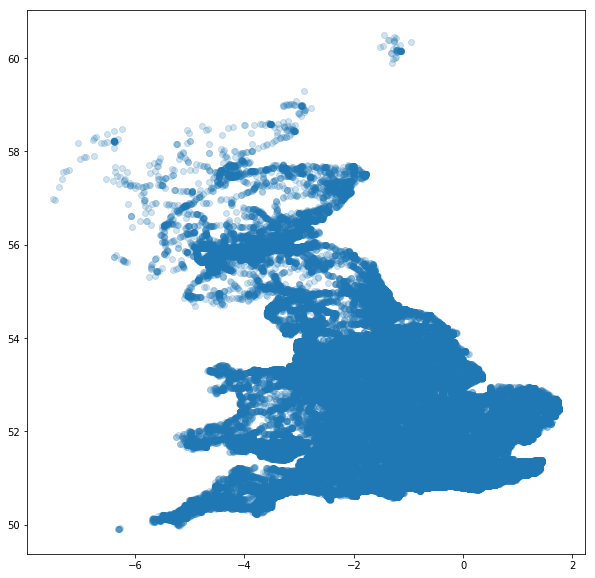

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), sharey=True)
axes.scatter(selection.Longitude.values, selection.Latitude.values, alpha=0.2)
plt.show()

In [34]:
import geopandas as gpd

In [35]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [49]:
UK = world[world['iso_a3']=='GBR']

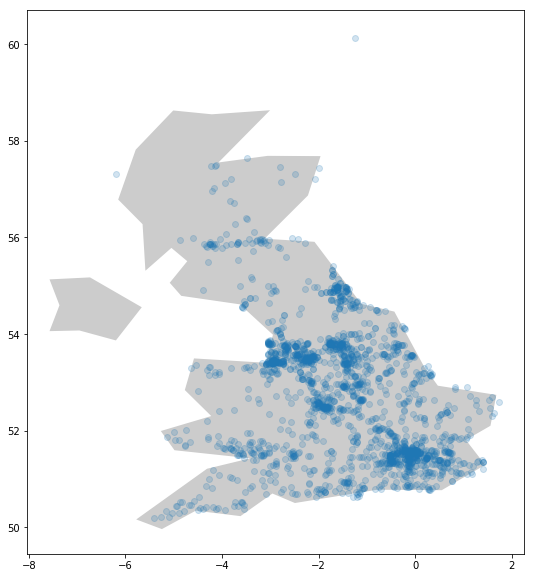

In [57]:
limit = 2000
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), sharey=True)
UK.plot(ax=axes, color='#CCCCCC')
axes.scatter(selection.Longitude.values[:limit], selection.Latitude.values[:limit], alpha=0.2)
plt.show()

# Example 1: k-means
Implement k-means using <code>NumPy</code> and functions